
# Train error vs Test error

Illustration of how the performance of an estimator on unseen data (test data)
is not the same as the performance on training data. As the regularization
increases the performance on train decreases while the performance on test
is optimal within a range of values of the regularization parameter.
The example with an Elastic-Net regression model and the performance is
measured using the explained variance a.k.a. R^2.


In [5]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

## Generate sample data



In [6]:
import numpy as np

from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

n_samples_train, n_samples_test, n_features = 75, 150, 500
X, y, coef = make_regression(
    n_samples=n_samples_train + n_samples_test,
    n_features=n_features,
    n_informative=50,
    shuffle=False,
    noise=1.0,
    coef=True,
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=n_samples_train, test_size=n_samples_test, shuffle=False
)

## Compute train and test errors



In [7]:

alphas = np.logspace(-5, 1, 60)
alphas


array([1.00000000e-05, 1.26384820e-05, 1.59731228e-05, 2.01876025e-05,
       2.55140652e-05, 3.22459055e-05, 4.07539297e-05, 5.15067808e-05,
       6.50967523e-05, 8.22724134e-05, 1.03979842e-04, 1.31414736e-04,
       1.66088278e-04, 2.09910372e-04, 2.65294846e-04, 3.35292415e-04,
       4.23758716e-04, 5.35566692e-04, 6.76875001e-04, 8.55467254e-04,
       1.08118075e-03, 1.36644835e-03, 1.72698329e-03, 2.18264473e-03,
       2.75853162e-03, 3.48636523e-03, 4.40623643e-03, 5.56881399e-03,
       7.03813555e-03, 8.89513497e-03, 1.12421004e-02, 1.42083083e-02,
       1.79571449e-02, 2.26951054e-02, 2.86831681e-02, 3.62511705e-02,
       4.58159767e-02, 5.79044398e-02, 7.31824222e-02, 9.24914728e-02,
       1.16895182e-01, 1.47737765e-01, 1.86718109e-01, 2.35983347e-01,
       2.98247129e-01, 3.76939098e-01, 4.76393801e-01, 6.02089449e-01,
       7.60949669e-01, 9.61724871e-01, 1.21547425e+00, 1.53617495e+00,
       1.94149195e+00, 2.45375111e+00, 3.10116893e+00, 3.91940677e+00,
      

In [8]:
enet = linear_model.ElasticNet(l1_ratio=0.7, max_iter=10000)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
enet.set_params(alpha=alpha_optim)
coef_ = enet.fit(X, y).coef_

Optimal regularization parameter : 0.00026529484644318975


## Plot results functions



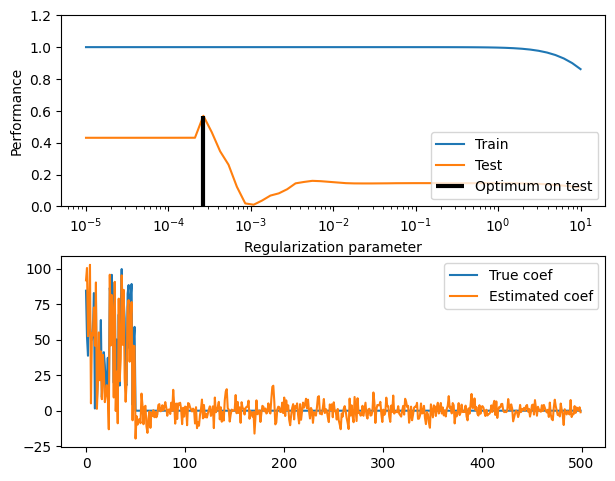

In [4]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label="Train")
plt.semilogx(alphas, test_errors, label="Test")
plt.vlines(
    alpha_optim,
    plt.ylim()[0],
    np.max(test_errors),
    color="k",
    linewidth=3,
    label="Optimum on test",
)
plt.legend(loc="lower right")
plt.ylim([0, 1.2])
plt.xlabel("Regularization parameter")
plt.ylabel("Performance")

# Show estimated coef_ vs true coef
plt.subplot(2, 1, 2)
plt.plot(coef, label="True coef")
plt.plot(coef_, label="Estimated coef")
plt.legend()
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()